# Ling 380 - Week 11

# Authorship attribution and style analysis

This is a very general area of study that can help you figure out who wrote what, but also the differences among authors. Authorship attribution is quite popular in literature, for instance, determining if an anonymous piece of fiction was written by a famous author, based on that author's published work. That's, in part, how it was discovered that ['The Cuckoo's Calling', by one Robert Galbraith, was, in fact, the work of J.K. Rowling](https://www.scientificamerican.com/article/how-a-computer-program-helped-show-jk-rowling-write-a-cuckoos-calling/). Authorship attribution is one of the subfields within [forensic linguistics](https://en.wikipedia.org/wiki/Forensic_linguistics).

More generally, the method can be applied to investigate the style of a text, to figure out how complex it is, or what other characteristics it has, a field known as [stylometry](https://en.wikipedia.org/wiki/Stylometry). 

To figure out the characteristics of text, and, more importantly, to distinguish the style of different authors, we can use different measures. Among the most common are:

* Word length
  * Average frequency, or frequency distribution. This may distinguish authors that like long words. In English, this usually means words of Latinate origin. So this tells us something about the vocabulary of an author. 
* Most common words
  * Some authors just like to use the same set of words often. This one is a bit tricky, because most common words may also have to do with the topic of the text, not with the author.
* Function words
  * Function words, or stopwords, are sometimes idiosynchratic. Some authors love to use _nonetheless_. Others prefer _nevertheless_. Some authors use a lot of _so_; others _but_ or _if_
  * Related, sometimes punctuation is an interesting marker of style. Do you use semi-colons often? Most people don't, but if you do, it's a tell.
* Parts of speech
  * Relative use of nouns, verbs, adverbs, etc. [Adverbs](https://www.livemint.com/Leisure/i8wjh4uNOfjbcZNuVvMPQM/The-adverbs-that-gave-JK-Rowling-away.html) were one of the characteristics of J.K. Rowling's style that tied her to Robert Galbraith.
* Statistical similarity
  * Various methods of statististical similarity across texts. 

# Style comparison

The code below comes from the book [Real World Python](https://nostarch.com/real-world-python/) and the book's [repository](https://github.com/rlvaugh/Real_World_Python/tree/master).

We will compare three things in three different books:
* Word length
* Stop word use
* Part of speech tags

The books for this notebook are in the directory 'reviews'. They are:

* [The Hound of the Baskervilles](https://www.gutenberg.org/ebooks/3070), by Arthur Conan Doyle, detective novel
* [The War of the Worlds](https://www.gutenberg.org/ebooks/26291), by H.G. Wells, science fiction
* [The Lost World](https://www.gutenberg.org/ebooks/139), also by Arthur Conan Doyle, science fiction

One of the points of this exercise is to see whether the genre (detective novel vs. science fiction) or the author's style (Doyle vs. Wells) helps group the books differently.

## Import statements

In [1]:
import os
import nltk
from nltk import punkt
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

### Define all the functions
These are a bit complex, but mostly because they produce the plots, using [matplotlib](https://matplotlib.org/), a visualization library. You can try and play with some of the parameters in the functions to produce different graphs, for instance, changing the colours, the distance between bars, or the type of graph (bars or plots).

In [ ]:
def text_to_string(filename):
    """Read a text file and return a string."""
    with open(filename, encoding="utf-8", errors="replace") as infile:
        return infile.read()
    
def make_word_dict(strings_by_author):
    """Return dictionary of tokenized words by corpus by author."""
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_by_author

def find_shortest_corpus(words_by_author):
    """Return length of shortest corpus."""
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('Number of words for {} = {}'.
              format(author, len(words_by_author[author])))
    len_shortest_corpus = min(word_count)
    print('length shortest corpus = {}'.format(len_shortest_corpus))        
    return len_shortest_corpus    

def word_length_test(words_by_author, len_shortest_corpus):
    """Plot word length freq by author, truncated to shortest corpus length, all together with bars next to each other."""
    by_author_length_freq_dist = dict()

    plt.figure(figsize=(12, 8))  # You can adjust the figure size if needed

    all_word_lengths = set()
    for author in words_by_author:
        word_lengths = [len(word) for word in words_by_author[author][:len_shortest_corpus]]
        all_word_lengths.update(word_lengths)
    
    all_word_lengths = sorted(list(all_word_lengths)) 

    bar_width = 0.2

    for i, author in enumerate(words_by_author):
        word_lengths = [len(word) for word in words_by_author[author][:len_shortest_corpus]]
        
        freq_dist = nltk.FreqDist(word_lengths)

        x = [length for length in all_word_lengths]
        y = [freq_dist[length] for length in all_word_lengths] 

        shifted_x = [length + i * bar_width for length in x] 

        plt.bar(shifted_x, y, label=author, alpha=0.7, width=bar_width)

    plt.title('Word length frequency distribution')
    plt.xlabel('Word length')
    plt.ylabel('Frequency')

    plt.legend()
    plt.xticks(all_word_lengths)
    plt.show()

def stopwords_test(words_by_author, len_shortest_corpus, top_n=30):
    """Plot most frequent stopwords by author, truncated to shortest corpus length."""
    plt.figure(figsize=(12, 8))
    stop_words = stopwords.words('english')

    stopword_labels = stop_words[:30]

    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author]
                               [:len_shortest_corpus] if word in stop_words]

        stopword_counts = Counter(stopwords_by_author)     
        top_stopwords = stopword_counts.most_common(top_n)
        if not top_stopwords:
            continue
        top_k, top_v = zip(*top_stopwords)
        shifted_x = np.arange(len(top_k)) + (i * 0.2)
        plt.bar(shifted_x, top_v, label=author, width=0.4, alpha=1)
        
    plt.xticks(np.arange(len(stopword_labels)), stopword_labels, rotation=90)
    plt.xlabel('Stopword')
    plt.ylabel('Frequency')
    plt.title(f'Most frequent stopwords by author (Top {top_n})')
    plt.legend()
    plt.show()
    
def parts_of_speech_test(words_by_author, len_shortest_corpus):
    """Plot author use of parts-of-speech such as nouns, verbs, adverbs, etc."""
    fdist = dict()

    plt.figure(figsize=(12, 8))
    
    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author][:len_shortest_corpus])]
        fdist[author] = Counter(pos_by_author)
        k, v = list(fdist[author].keys()), list(fdist[author].values())
        plt.plot(k, v, linestyle='', marker='^', label=author, markersize=10)

    plt.title('Part of speech by author')
    plt.xlabel('Parts of speech')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Read in the files

In [3]:
# change this to where your files are
path = './authorship'

In [4]:
# Create dictionary of strings by author from all text files in the directory
strings_by_author = {}
for filename in os.listdir(path):
    if filename.endswith('.txt'):  # Make sure it's a .txt file
        author_name = os.path.splitext(filename)[0]  # Use filename as the author name
        strings_by_author[author_name] = text_to_string(os.path.join(path, filename))

In [5]:
# tokenize texts
words_by_author = make_word_dict(strings_by_author)

In [6]:
# find the shortest book
# we'll truncate them all to this length
len_shortest_corpus = find_shortest_corpus(words_by_author)

Number of words for hound = 58387
Number of words for lost = 75000
Number of words for war = 59469
length shortest corpus = 58387


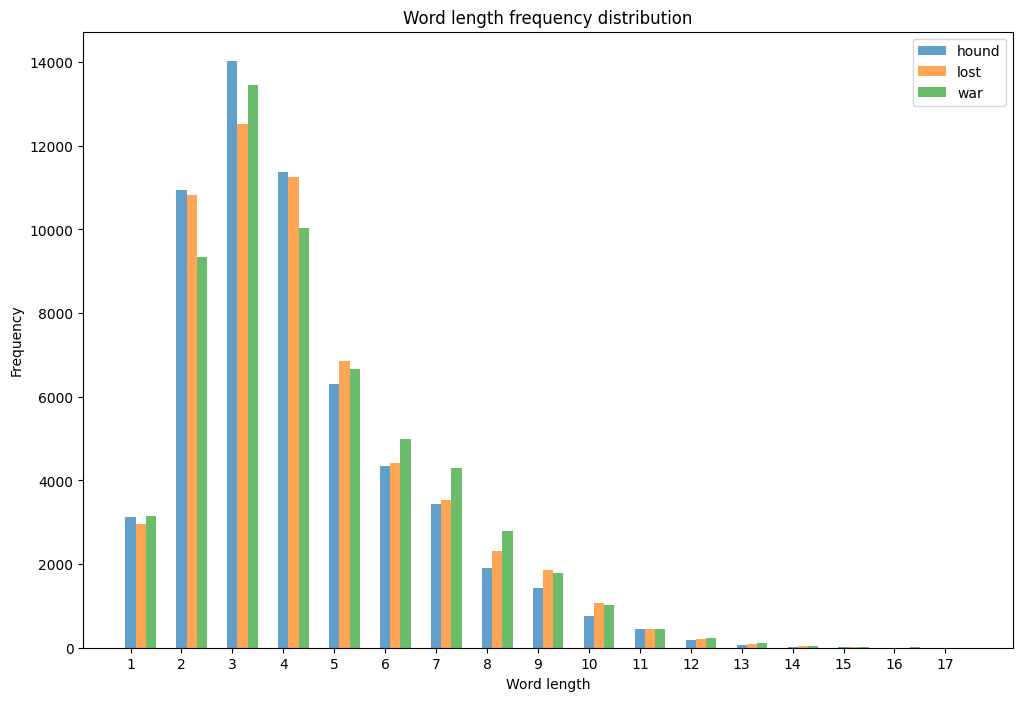

In [7]:
# plot the length of words
word_length_test(words_by_author, len_shortest_corpus)

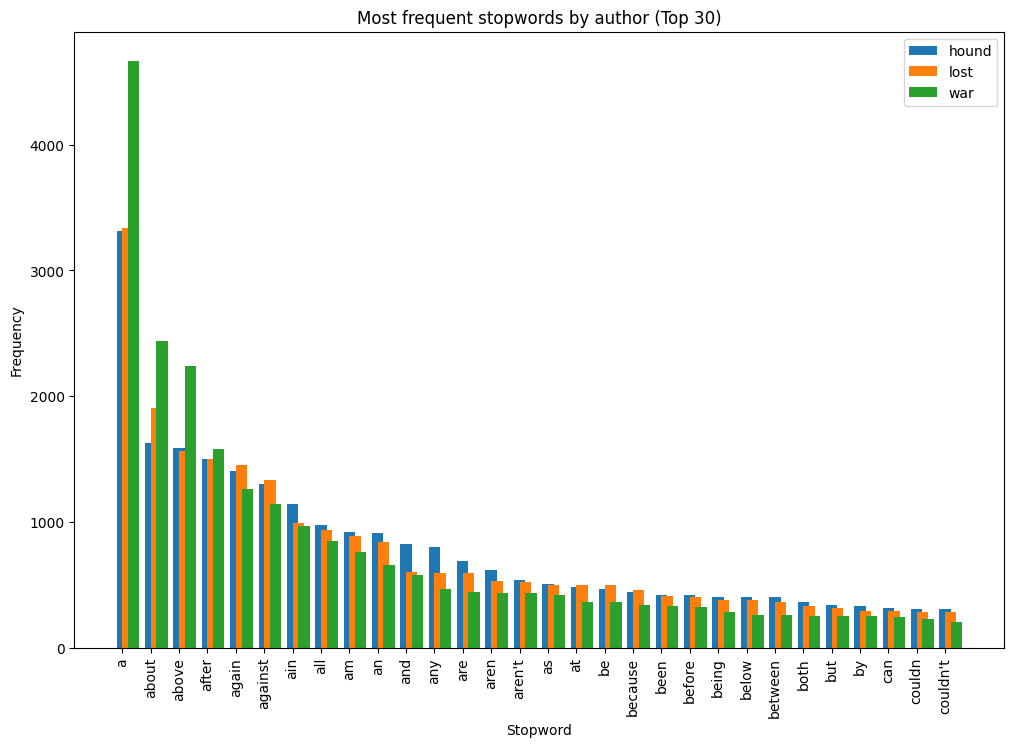

In [8]:
# plot the use of stopwords
stopwords_test(words_by_author, len_shortest_corpus)

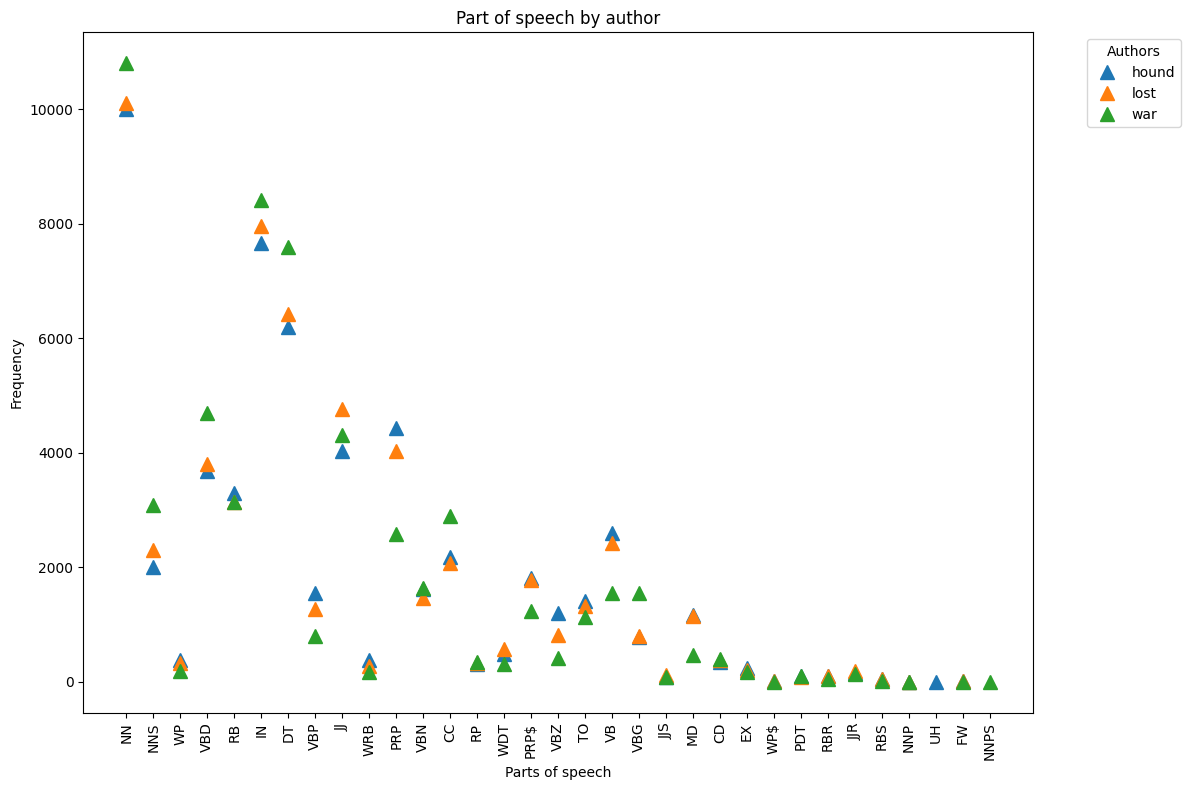

In [9]:
# plot the frequency of parts of speech
parts_of_speech_test(words_by_author, len_shortest_corpus)

# Summary

We have learned about authorship attribution and some techniques to calculate differences across authors. We have also learned to produce visualizations using matplotlib.